# Data Exploration and Treatment

#### Imports and Display of the DataFrame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  # Enables IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy.optimize import brentq


# Load the dataset
data_pwd = "../datasets/addyy_dirty_data/adidas_tick_options.csv"
options_data = pd.read_csv(data_pwd)

options_data.head()


,SecurityID,OptionID,Exchange,Currency,Bid,UnderlyingBid,Ask,UnderlyingAsk,Last,UnderlyingLast,...,ContractSize,OptionStyle,Version,ExerciseStyle,Expiration,StartDate,VALOR,Issuer,SEDOL,ISIN
0,500096,153742564,21,814,17.120001,77.750000,18.620001,77.750000,17.870001,77.750000,...,100,0,0,A,2013-04-19,2013-01-21,11730015,adidas AG,4031976,DE000A1EWWW0
1,500096,153703857,21,814,-99.989998,78.269997,-99.989998,78.269997,76.959999,78.269997,...,100,0,2,E,2013-06-21,2013-01-02,11730015,adidas AG,4031976,DE000A1EWWW0
2,500096,153123500,21,814,-99.989998,78.900002,-99.989998,78.900002,1.510000,78.900002,...,100,0,2,E,2016-12-16,2013-01-02,11730015,adidas AG,4031976,DE000A1EWWW0
3,500096,153779773,21,814,-99.989998,76.199997,-99.989998,76.199997,20.950001,76.199997,...,100,0,2,E,2013-05-17,2013-02-18,11730015,adidas AG,4031976,DE000A1EWWW0
4,500096,153703810,21,814,-99.989998,71.639999,0.150000,71.639999,0.150000,71.639999,...,100,0,0,A,2013-03-15,2013-01-02,11730015,adidas AG,4031976,DE000A1EWWW0


From exploring the dataset, we see that the data provider gave some Ask and Bid placeholder values that are not valid (-98.98998). In order to tackle them, I will use Iterative imputing (I've tested KNN and it produces some phishy results).

In [2]:
# Replace values close to -99.989998 (within the tolerance range) with NaN
tolerance_value = -99.989998
tolerance_range = 0.05  # Allowable deviation from -99.99

# Replace values close to the threshold with NaN using applymap
options_data_cleaned = options_data.applymap(
    lambda x: np.nan if isinstance(x, (int, float)) and abs(x - tolerance_value) < tolerance_range else x
)

options_data_cleaned

,SecurityID,OptionID,Exchange,Currency,Bid,UnderlyingBid,Ask,UnderlyingAsk,Last,UnderlyingLast,...,ContractSize,OptionStyle,Version,ExerciseStyle,Expiration,StartDate,VALOR,Issuer,SEDOL,ISIN
0,500096,153742564,21,814,17.120001,77.750000,18.620001,77.750000,17.870001,77.750000,...,100,0,0,A,2013-04-19,2013-01-21,11730015,adidas AG,4031976,DE000A1EWWW0
1,500096,153703857,21,814,NaN,78.269997,NaN,78.269997,76.959999,78.269997,...,100,0,2,E,2013-06-21,2013-01-02,11730015,adidas AG,4031976,DE000A1EWWW0
2,500096,153123500,21,814,NaN,78.900002,NaN,78.900002,1.510000,78.900002,...,100,0,2,E,2016-12-16,2013-01-02,11730015,adidas AG,4031976,DE000A1EWWW0
3,500096,153779773,21,814,NaN,76.199997,NaN,76.199997,20.950001,76.199997,...,100,0,2,E,2013-05-17,2013-02-18,11730015,adidas AG,4031976,DE000A1EWWW0
4,500096,153703810,21,814,NaN,71.639999,0.150000,71.639999,0.150000,71.639999,...,100,0,0,A,2013-03-15,2013-01-02,11730015,adidas AG,4031976,DE000A1EWWW0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8691,500096,151977003,21,814,49.419998,77.750000,50.220001,77.750000,49.820000,77.750000,...,100,0,0,A,2014-12-19,2010-10-11,11730015,adidas AG,4031976,DE000A1EWWW0
8692,500096,153122332,21,814,0.600000,70.540001,0.750000,70.540001,0.675000,70.540001,...,100,0,0,A,2014-06-20,2013-01-02,11730015,adidas AG,4031976,DE000A1EWWW0
8693,500096,153123161,21,814,NaN,79.750000,NaN,79.750000,4.920000,79.750000,...,100,0,2,E,2013-06-21,2013-01-02,11730015,adidas AG,4031976,DE000A1EWWW0
8694,500096,153547336,21,814,0.210000,78.889999,0.330000,78.889999,0.270000,78.889999,...,100,0,0,A,2013-09-20,2013-01-02,11730015,adidas AG,4031976,DE000A1EWWW0


Now we work on Scaling (to normalize the importance of features with higher values) and then perform imputation.

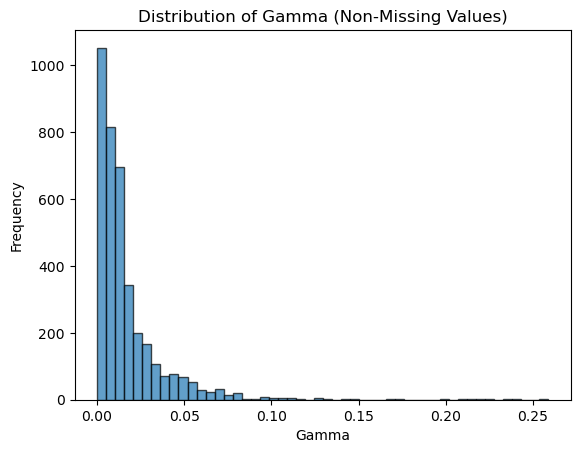

               Bid          Ask       Spread  ImpliedVolatility        Gamma
count  8696.000000  8696.000000  8696.000000        8696.000000  8696.000000
mean     19.862936    20.369267     0.506331           0.519874     0.009939
std      10.921177    11.177059     0.936664           0.220044     0.015995
min      -0.332268     0.020000     0.010000           0.154445     0.001000
25%      12.652500    13.680000     0.010000           0.263176     0.002911
50%      24.417238    24.462148     0.090000           0.631019     0.005662
75%      25.929445    26.130665     0.809999           0.689033     0.009491
max      78.830002    80.330002    12.024693           1.701015     0.258674


In [9]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Define the columns to impute directly
columns_to_impute = ['Bid', 'Ask', 'UnderlyingBid', 'UnderlyingAsk', 
                     'Delta', 'Gamma', 'Vega', 'Theta', 'Strike', 'ImpliedVolatility']

# Create a copy of the dataset
data = options_data_cleaned.copy()

# Step 1: Visualize the distribution of Gamma (non-missing values)
plt.hist(data['Gamma'].dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Gamma (Non-Missing Values)')
plt.xlabel('Gamma')
plt.ylabel('Frequency')
plt.show()

# Step 2: Scaling and XGBoost-based imputation function
def xgboost_impute(data, columns_to_impute, n_estimators=500, max_depth=6):
    """
    Function to perform XGBoost-based imputation on the specified columns of a dataset.
    Scales the data before imputation and applies inverse scaling afterward.
    """
    scaler = StandardScaler()  # Initialize the scaler

    for column in columns_to_impute:
        # Identify rows with missing and non-missing values for the current column
        missing_mask = data[column].isnull()
        non_missing_mask = ~missing_mask

        # Only proceed if there are missing values in this column
        if missing_mask.sum() > 0:
            # Prepare the training data (non-missing rows)
            X_train = data.loc[non_missing_mask, columns_to_impute].drop(columns=[column])
            y_train = data.loc[non_missing_mask, column]

            # Prepare the data for prediction (missing rows)
            X_pred = data.loc[missing_mask, columns_to_impute].drop(columns=[column])

            # Scale the features
            X_train_scaled = scaler.fit_transform(X_train)
            X_pred_scaled = scaler.transform(X_pred)

            # Train the XGBoost model
            model = xgb.XGBRegressor(
                n_estimators=n_estimators,
                max_depth=max_depth,
                learning_rate=0.05,  # Slower learning for better precision
                subsample=0.8,       # Use 80% of rows per tree
                colsample_bytree=0.8,  # Use 80% of columns per tree
                random_state=42
            )
            model.fit(X_train_scaled, y_train)

            # Predict missing values
            y_pred = model.predict(X_pred_scaled)

            # Update the dataset with the predicted values
            data.loc[missing_mask, column] = y_pred
            
    return data

# Step 3: Perform XGBoost-based imputation with scaling
options_data_imputed = xgboost_impute(data, columns_to_impute)

# Step 4: Ensure constraints
# 1. Ask > Bid
options_data_imputed['Ask'] = np.maximum(options_data_imputed['Ask'], options_data_imputed['Bid'] + 0.01)

# 2. Implied Volatility > 0
options_data_imputed['ImpliedVolatility'] = options_data_imputed['ImpliedVolatility'].apply(lambda x: max(x, 0.01))

# 3. Gamma >= a reasonable floor
gamma_floor = 0.001  # Set based on domain knowledge
options_data_imputed['Gamma'] = options_data_imputed['Gamma'].apply(lambda x: max(x, gamma_floor))

# Step 5: Validate by checking spreads and recalculated dataset
options_data_imputed['Spread'] = options_data_imputed['Ask'] - options_data_imputed['Bid']

# Display summary of key features
summary = options_data_imputed[['Bid', 'Ask', 'Spread', 'ImpliedVolatility', 'Gamma']].describe()
print(summary)


Making Correlation Matrix and comparing the data before and after imputation.

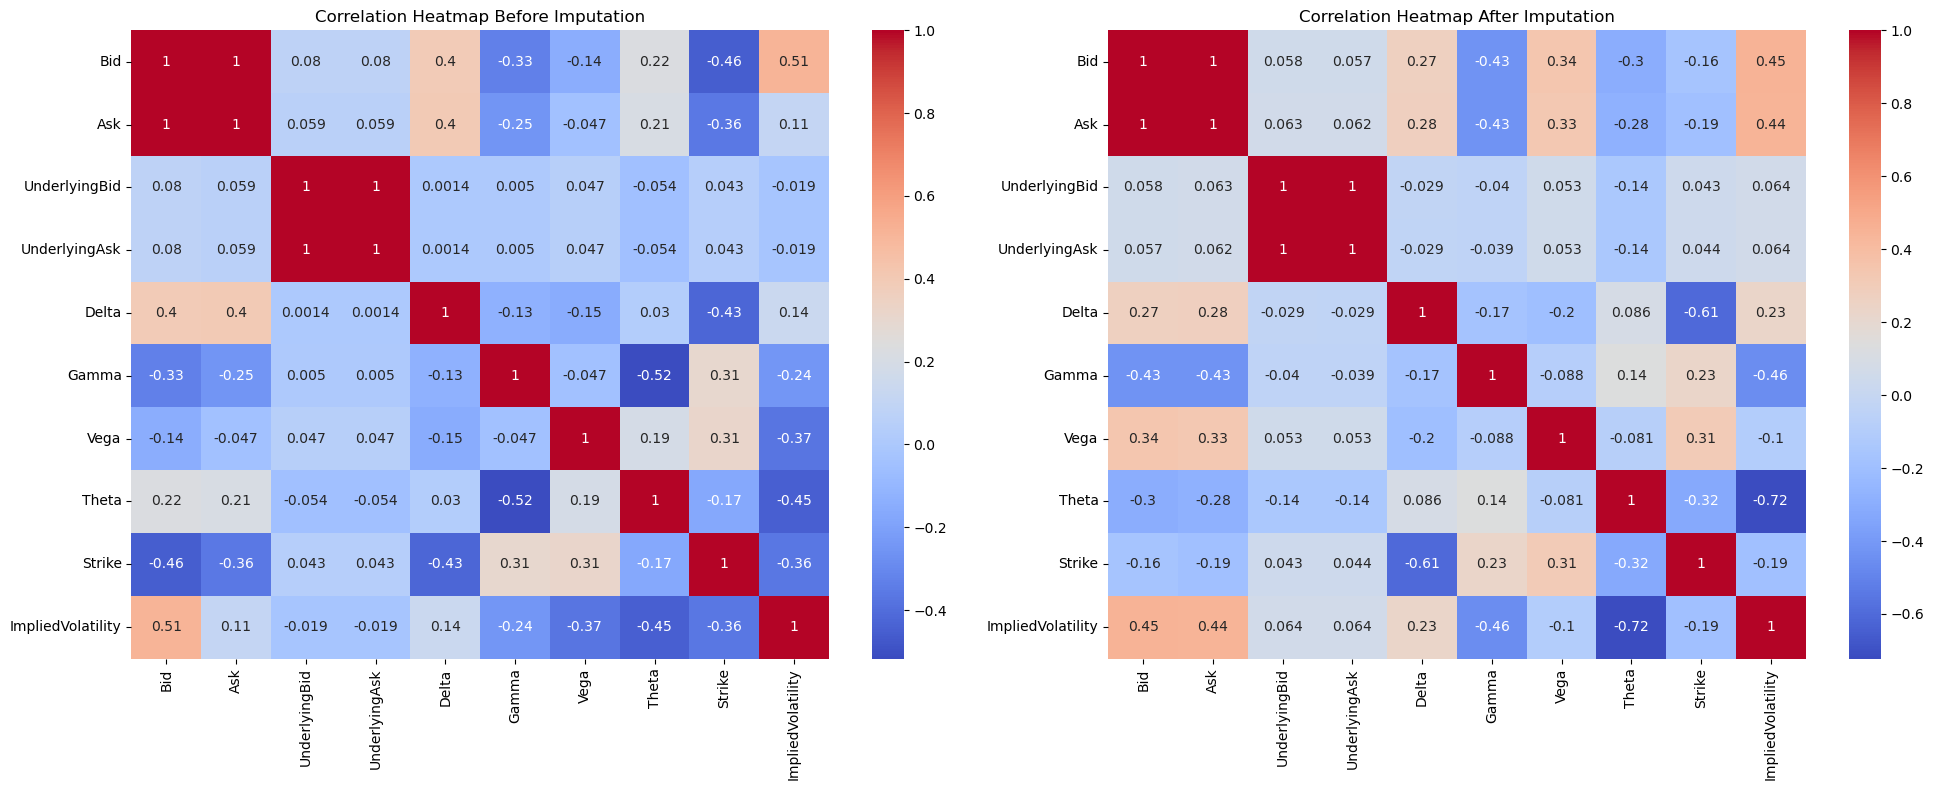

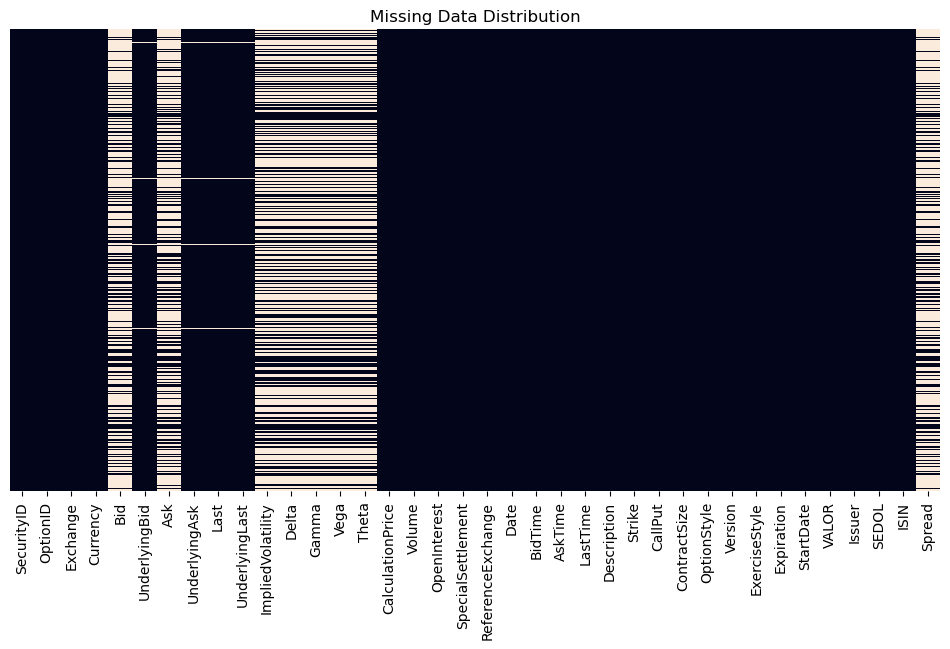

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))


correlation_matrix = options_data_cleaned[columns_to_impute].corr()
imputed_correlation_matrix = options_data_imputed[columns_to_impute].corr()

# 1. Correlation Matrix Before Imputation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title("Correlation Heatmap Before Imputation")

# 2. Correlation Matrix After Imputation
sns.heatmap(imputed_correlation_matrix, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title("Correlation Heatmap After Imputation")

# Show the side-by-side comparison
plt.tight_layout()
plt.show()

# Plot the Missing Data Distribution
plt.figure(figsize=(12, 6))
sns.heatmap(options_data_cleaned.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Data Distribution")
plt.show()


Now, to further validate the imputation, we check the spreads and their distributions. As a rule of thumb, we want the "Ask" value higher than the "Bid" value for the majority of the data - but not by a lot.

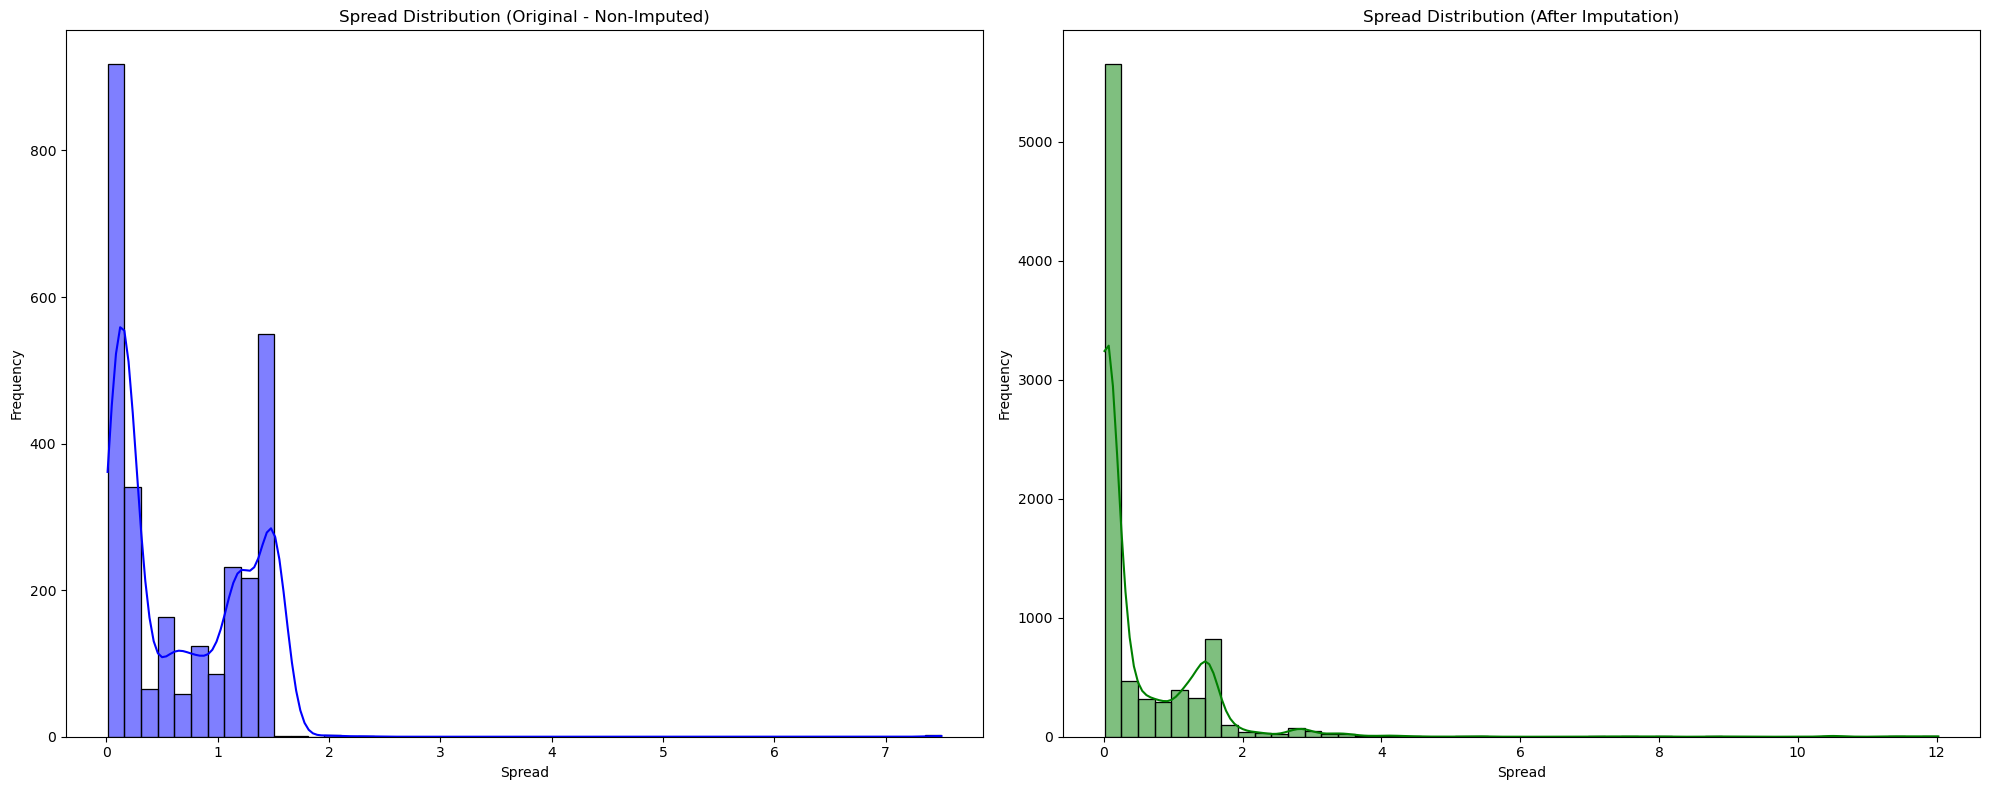

In [11]:
options_data_imputed['Spread'] = options_data_imputed['Ask'] - options_data_imputed['Bid']

options_data_cleaned['Spread'] = options_data_cleaned['Ask'] - options_data_cleaned['Bid']

# Determine the common x-axis range
spread_min = min(options_data_cleaned['Spread'].min(), options_data_imputed['Spread'].min())
spread_max = max(options_data_cleaned['Spread'].max(), options_data_imputed['Spread'].max())

# Create side-by-side spread histograms with shared x and y axis ranges
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Original (non-imputed) Spread Distribution
sns.histplot(options_data_cleaned['Spread'], kde=True, bins=50, color='blue', ax=axes[0])
axes[0].set_title('Spread Distribution (Original - Non-Imputed)')
axes[0].set_xlabel('Spread')
axes[0].set_ylabel('Frequency')

# Imputed Spread Distribution
sns.histplot(options_data_imputed['Spread'], kde=True, bins=50, color='green', ax=axes[1])
axes[1].set_title('Spread Distribution (After Imputation)')
axes[1].set_xlabel('Spread')
axes[1].set_ylabel('Frequency')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

To finish up our data treatment, we now create a few rows calculating some metrics that will probably be important for our modelling.

In [12]:
# Moneyness
options_data_imputed['Moneyness'] = options_data_imputed['UnderlyingLast'] / options_data_imputed['Strike']

# Time to Maturity:
options_data_imputed['ExpirationDate'] = pd.to_datetime(options_data_imputed['Expiration'])
options_data_imputed['CurrentDate'] = pd.to_datetime(options_data_imputed['Date'])
options_data_imputed['TimeToMaturity'] = (options_data_imputed['ExpirationDate'] - options_data_imputed['CurrentDate']).dt.days


In [13]:
options_data_imputed

,SecurityID,OptionID,Exchange,Currency,Bid,UnderlyingBid,Ask,UnderlyingAsk,Last,UnderlyingLast,...,StartDate,VALOR,Issuer,SEDOL,ISIN,Spread,Moneyness,ExpirationDate,CurrentDate,TimeToMaturity
0,500096,153742564,21,814,17.120001,77.750000,18.620001,77.750000,17.870001,77.750000,...,2013-01-21,11730015,adidas AG,4031976,DE000A1EWWW0,1.500000,0.001296,2013-04-19,2013-03-11,39
1,500096,153703857,21,814,36.787144,78.269997,48.102188,78.269997,76.959999,78.269997,...,2013-01-02,11730015,adidas AG,4031976,DE000A1EWWW0,11.315044,7.827000,2013-06-21,2013-03-12,101
2,500096,153123500,21,814,28.524687,78.900002,31.289431,78.900002,1.510000,78.900002,...,2013-01-02,11730015,adidas AG,4031976,DE000A1EWWW0,2.764744,0.001973,2016-12-16,2013-03-14,1373
3,500096,153779773,21,814,26.444281,76.199997,26.454281,76.199997,20.950001,76.199997,...,2013-02-18,11730015,adidas AG,4031976,DE000A1EWWW0,0.010000,0.001411,2013-05-17,2013-03-08,70
4,500096,153703810,21,814,0.524864,71.639999,0.534864,71.639999,0.150000,71.639999,...,2013-01-02,11730015,adidas AG,4031976,DE000A1EWWW0,0.010000,0.001327,2013-03-15,2013-03-05,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8691,500096,151977003,21,814,49.419998,77.750000,50.220001,77.750000,49.820000,77.750000,...,2010-10-11,11730015,adidas AG,4031976,DE000A1EWWW0,0.800003,0.002777,2014-12-19,2013-03-11,648
8692,500096,153122332,21,814,0.600000,70.540001,0.750000,70.540001,0.675000,70.540001,...,2013-01-02,11730015,adidas AG,4031976,DE000A1EWWW0,0.150000,0.001603,2014-06-20,2013-03-01,476
8693,500096,153123161,21,814,23.978495,79.750000,24.023201,79.750000,4.920000,79.750000,...,2013-01-02,11730015,adidas AG,4031976,DE000A1EWWW0,0.044706,0.001049,2013-06-21,2013-03-15,98
8694,500096,153547336,21,814,0.210000,78.889999,0.330000,78.889999,0.270000,78.889999,...,2013-01-02,11730015,adidas AG,4031976,DE000A1EWWW0,0.120000,0.001409,2013-09-20,2013-03-13,191


Saving the data into the datasets folder:

In [14]:
# Separate datasets by Call/Put and Exercise Style
calls = options_data_imputed[options_data_imputed['CallPut'] == 'C']
puts = options_data_imputed[options_data_imputed['CallPut'] == 'P']

european_calls = calls[calls['ExerciseStyle'] == 'E']
american_calls = calls[calls['ExerciseStyle'] == 'A']

european_puts = puts[puts['ExerciseStyle'] == 'E']
american_puts = puts[puts['ExerciseStyle'] == 'A']

# Save datasets to CSV files in the same folder
output_folder = "../datasets/addyy_dirty_data/"

european_calls.to_csv(f"{output_folder}european_calls.csv", index=False)
american_calls.to_csv(f"{output_folder}american_calls.csv", index=False)
european_puts.to_csv(f"{output_folder}european_puts.csv", index=False)
american_puts.to_csv(f"{output_folder}american_puts.csv", index=False)

import os

# Verify the files were saved
os.listdir(output_folder)


['.ipynb_checkpoints',
 'adidas_tick_options.csv',
 'american_calls.csv',
 'american_puts.csv',
 'european_calls.csv',
 'european_puts.csv']